# Save Multipoles to ASCII Files

### Setup Environment

In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
from matplotlib.pyplot import *
# Import needed packages from positive
from positive.plotting import sYlm_mollweide_plot
from positive import alert
# Import other usefuls
from os.path import expanduser
from nrutils import scsearch,gwylm
from nrutils.core.basics import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


### Find a simulation

In [3]:
A = scsearch(institute='bam',keyword='q4a08t120',verbose=True)

(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found keyword (=q4a08t120) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q4: 1chi0.80-p-q4.00	(q4a08t120dP1_T_96_360)



### Load waveform data

In [4]:
y = gwylm(A[0],lmax=3,verbose=True,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lmax (=3) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x111f45cb0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, -2), (2, -1), (2, 0), (2, 1), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)]
(load)>> Using the default extraction_parameter of 5
(load)>> Using the default level of 7
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform

### Plot the mass quadrupole

([<matplotlib.axes._subplots.AxesSubplot at 0x112212b50>,
 <matplotlib.figure.Figure at 0x113e00d10>)

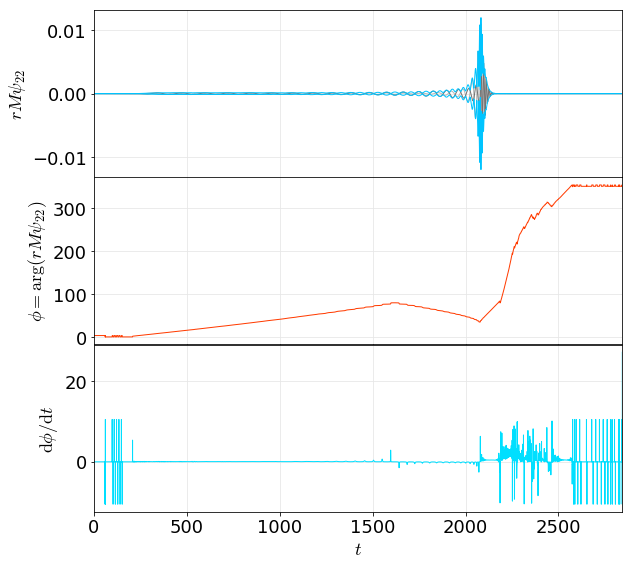

In [5]:
y[2,2]['psi4'].plot()

### Use package function to save data

In [24]:
#
for kind in ('psi4','news','strain'):
    y.saveto('/Users/book/Desktop/',kind=kind)

(mkdir)>> Directory at "/Users/book/Desktop/q4a08t120dP1_T_96_360" already exists and will be not be altered or created..
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m-1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m-1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m3.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m0.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m-2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m1.asc"
(saveto)>> ascii data stored 

In [26]:
a = loadtxt('/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m2.asc')
t,p,c = a.T

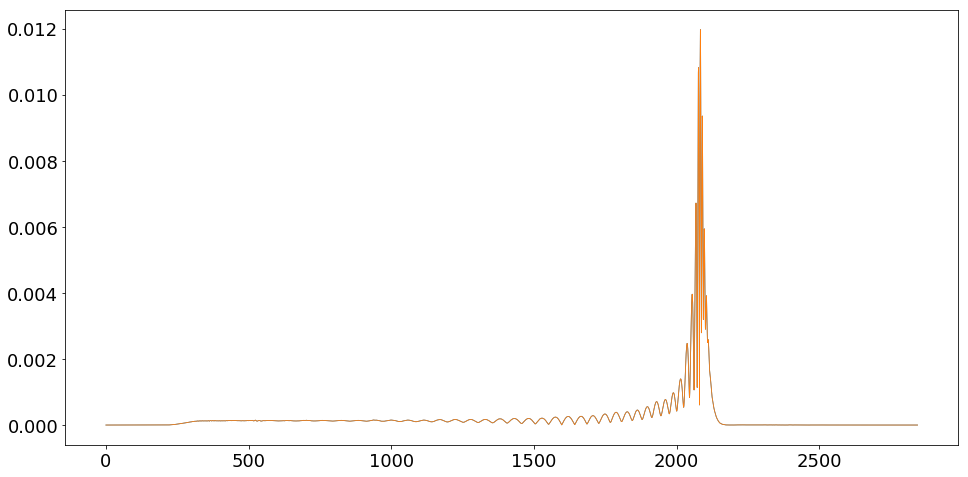

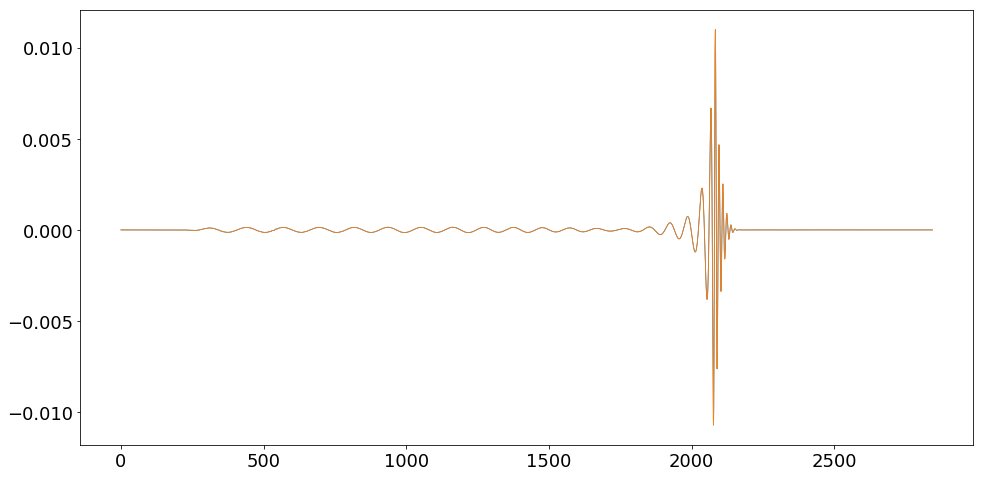

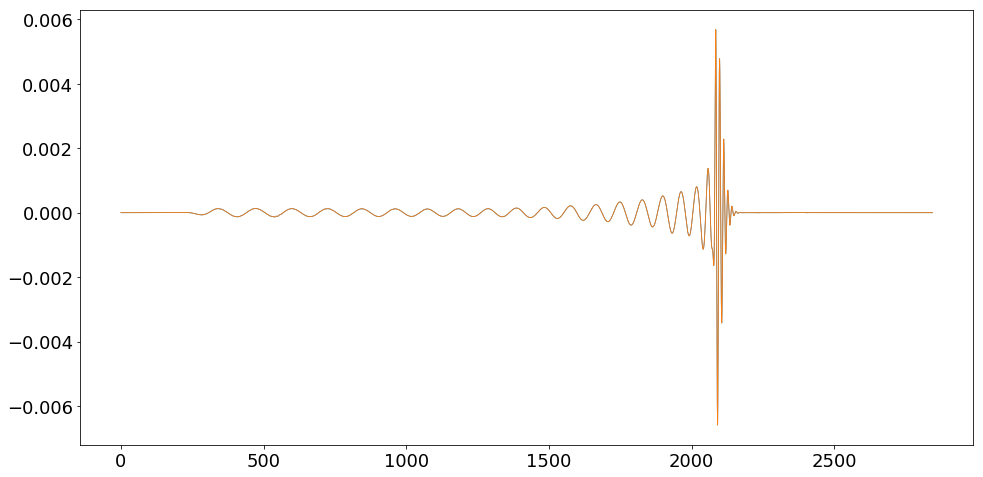

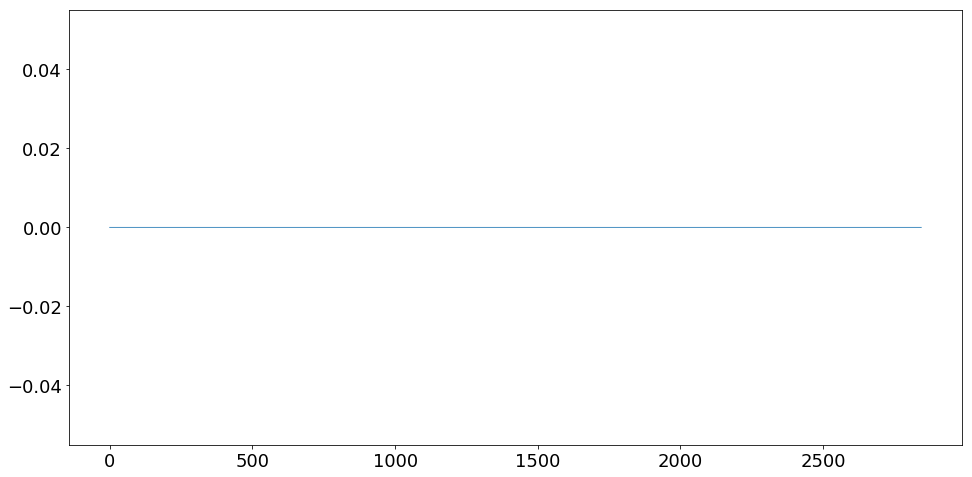

In [34]:

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, abs(p+1j*c) )
plot( y.t, y[2,2]['psi4'].amp )

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, p )
plot( y.t, y[2,2]['psi4'].plus )

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, c )
plot( y.t, y[2,2]['psi4'].cross )

fig = figure( figsize = 2*figaspect(0.5) )
plot( y.t, abs(p+1j*c)-y[2,2]['psi4'].amp )